In [20]:
from tensorflow.keras.layers import Input,Dense,Flatten,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [21]:
IMAGE_SIZE=[224,224]
train_path='train/'
train_path='test/'

In [22]:
#Download weight from imagnet
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [23]:
#dont train all layers because we are using transfer learning
for layer in resnet.layers:
    layer.trainable=False

In [24]:
folders=glob('train/*')

In [25]:
len(folders)


2

In [26]:
x=Flatten()(resnet.output)

In [27]:
#output node as per our categories
prediction=Dense(len(folders),activation='softmax')(x)

In [28]:
model=Model(inputs=resnet.input,outputs=prediction)

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [30]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics='accuracy'
)

In [31]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 196 images belonging to 2 classes.


In [33]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 56 images belonging to 2 classes.


In [34]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
7/7 [==============================] - 35s 4s/step - loss: 4.6446 - accuracy: 0.5697 - val_loss: 3.2714 - val_accuracy: 0.3929
Epoch 2/20
7/7 [==============================] - 25s 4s/step - loss: 2.9167 - accuracy: 0.4811 - val_loss: 3.3423 - val_accuracy: 0.3929
Epoch 3/20
7/7 [==============================] - 25s 4s/step - loss: 2.7656 - accuracy: 0.5383 - val_loss: 2.9721 - val_accuracy: 0.6071
Epoch 4/20
7/7 [==============================] - 25s 3s/step - loss: 2.5587 - accuracy: 0.5737 - val_loss: 0.8013 - val_accuracy: 0.6071
Epoch 5/20
7/7 [==============================] - 25s 3s/step - loss: 1.4540 - accuracy: 0.4740 - val_loss: 0.8217 - val_accuracy: 0.6250
Epoch 6/20
7/7 [==============================] - 23s 3s/step - loss: 0.9974 - accuracy: 0.5268 - val_loss: 0.8763 - val_accuracy: 0.6071
Epoch 7/20
7/7 [==============================] - 27s 4s/step - loss: 0.7492 - accuracy: 0.5872 - val_loss: 1.3214 - val_accuracy: 0.6071
Epoch 8/20
7/7 [==================

In [35]:
import matplotlib.pyplot as plt


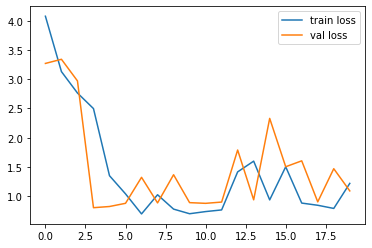

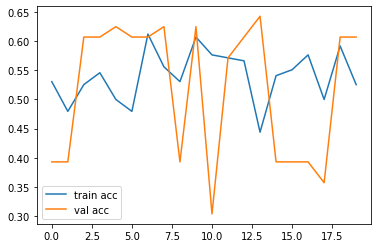

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc') 

In [37]:

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [38]:
y_pred = model.predict(test_set)

In [39]:

y_pred


array([[0.76795137, 0.23204856],
       [0.8532882 , 0.14671175],
       [0.9098363 , 0.09016372],
       [0.93762195, 0.0623781 ],
       [0.7998755 , 0.20012449],
       [0.88016254, 0.11983748],
       [0.9488131 , 0.05118699],
       [0.80968446, 0.19031553],
       [0.8871855 , 0.11281447],
       [0.9244558 , 0.07554417],
       [0.97514886, 0.02485113],
       [0.48643363, 0.5135663 ],
       [0.46050286, 0.53949714],
       [0.87575   , 0.12424993],
       [0.77921623, 0.22078374],
       [0.8039874 , 0.1960126 ],
       [0.94029504, 0.05970494],
       [0.950683  , 0.04931701],
       [0.81034523, 0.18965478],
       [0.9707238 , 0.02927615],
       [0.73009366, 0.2699064 ],
       [0.82506835, 0.17493163],
       [0.9063967 , 0.0936033 ],
       [0.8783482 , 0.12165183],
       [0.8495005 , 0.15049958],
       [0.87950546, 0.12049452],
       [0.9259641 , 0.07403588],
       [0.8605338 , 0.13946626],
       [0.9566875 , 0.04331256],
       [0.9746074 , 0.02539255],
       [0.

In [40]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [41]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [49]:
model=load_model('model_resnet50.h5')

NameError: name 'img_data' is not defined

In [79]:
img=image.load_img('testing_img/C189P150ThinF_IMG_20151203_140902_cell_121.png',target_size=(224,224))

In [80]:

x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [81]:
x.shape


(224, 224, 3)

In [82]:

x=x/255

In [83]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [84]:
model.predict(img_data)

array([[0.04441127, 0.95558876]], dtype=float32)

In [85]:
a=np.argmax(model.predict(img_data), axis=1)

In [86]:
a==1

array([ True])